In [30]:
from helpers_gradient import *
import pandas as pd
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt
from nilearn import plotting

In [2]:

emb_path = '/home/romy.beaute/projects/hypnomed/diffusion_embedding/emb_matrices'
emb_mat = 'group_control_meditation_hypnose_embedding.mat'
emb_outpath = os.path.join(emb_path,emb_mat)

blocks = ['run-1','run-2','run-3']
states = ['control','meditation','hypnose']
sub_outliers = ['27','32'] #subjects excluded for analysis

b,b_emb = load_embmat(emb_path=emb_outpath,show_infos=True)
b_emb.shape

 - shape embedding (n_subjects, n_voxels, n_dims): (119, 18715, 5)
 - n = 40 subjects
 - condition : ['control   ' 'meditation' 'hypnose   ']
 - path : /home/romy.beaute/projects/hypnomed/diffusion_embedding/emb_matrices/group_control_meditation_hypnose_embedding.mat



In [18]:
#Load embedding matrices

#Control condition
_,b_con = load_embmat(os.path.join(emb_path,'group/group_control_embedding.mat'))
c = np.delete(b_con,31,0)
c = np.delete(c,26,0)

#Meditation condition
_,b_med = load_embmat(os.path.join(emb_path,'group/group_meditation_embedding.mat'))
m = np.delete(b_med,31,0)
m = np.delete(m,26,0)

#Hypnosis condition
_,b_hyp = load_embmat(os.path.join(emb_path,'group/group_hypnose_embedding.mat'))
h = np.delete(b_hyp,31,0)

 - shape embedding (n_subjects, n_voxels, n_dims): (40, 18715, 5)
 - n = 40 subjects
 - condition : ['control']
 - path : /home/romy.beaute/projects/hypnomed/diffusion_embedding/emb_matrices/group/group_control_embedding.mat

 - shape embedding (n_subjects, n_voxels, n_dims): (40, 18715, 5)
 - n = 40 subjects
 - condition : ['meditation']
 - path : /home/romy.beaute/projects/hypnomed/diffusion_embedding/emb_matrices/group/group_meditation_embedding.mat

 - shape embedding (n_subjects, n_voxels, n_dims): (39, 18715, 5)
 - n = 40 subjects
 - condition : ['hypnose']
 - path : /home/romy.beaute/projects/hypnomed/diffusion_embedding/emb_matrices/group/group_hypnose_embedding.mat



In [26]:
input = np.vstack((c,m,h))
print(input.shape)

c_emb = input[:38]
m_emb = input[38:76]
h_emb = input[76:]


c_vs_m = np.vstack((c,m))
c_vs_h = np.vstack((c,h))
m_vs_h = np.vstack((m,h))

n_subjects = input.shape[0]//3
print('n subjects = ',n_subjects)


condition_effect_triple = np.hstack(([1] * n_subjects, [2] * n_subjects, [3] * n_subjects))
condition_effect_double = np.hstack(([1] * n_subjects, [-1] * n_subjects))


subject_effect_triple = np.vstack((np.eye(n_subjects), np.eye(n_subjects),np.eye(n_subjects)))
subject_effect_double = np.vstack((np.eye(n_subjects), np.eye(n_subjects)))

print(subject_effect_double.shape,subject_effect_triple.shape)
emb_sample = [f'sub-{i:02d}' for i in range(1, n_subjects + 1)]

(114, 18715)
n subjects =  38
(76, 38) (114, 38)


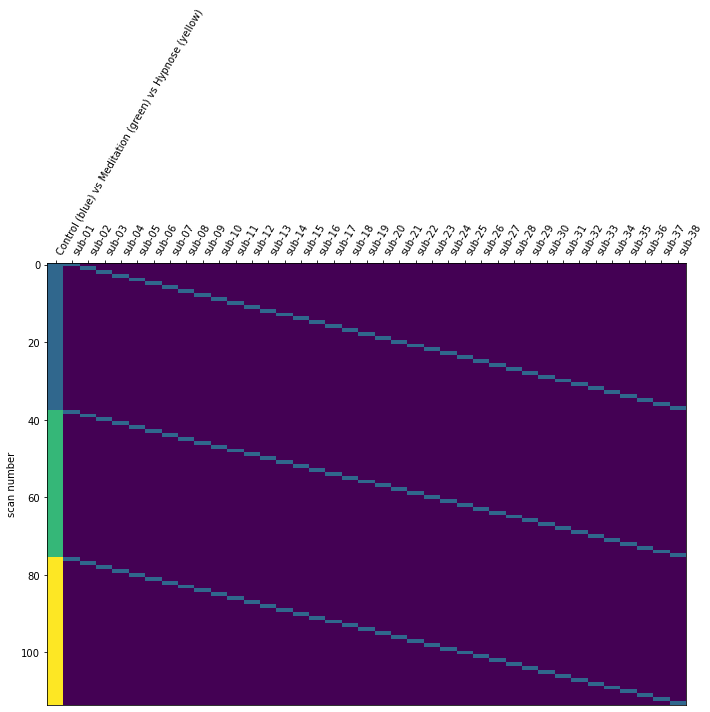

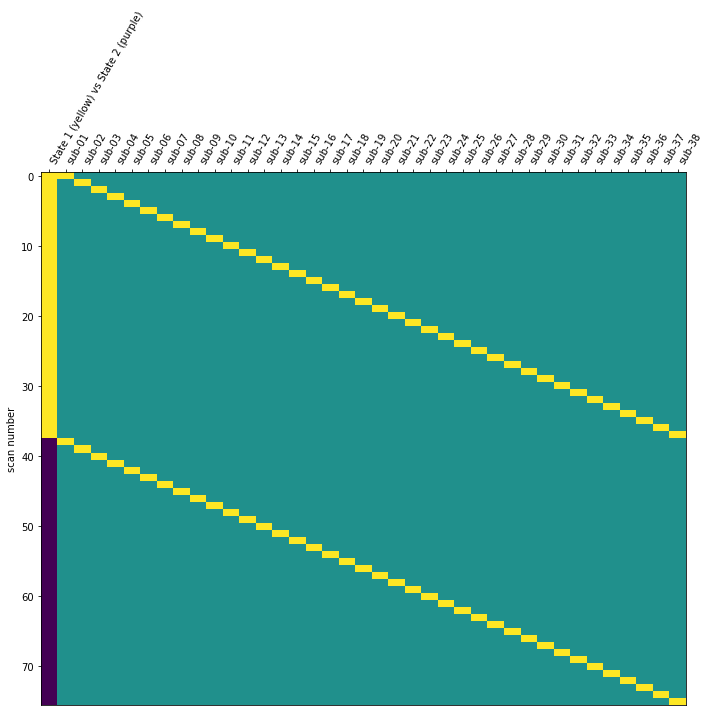

In [32]:
#Triple effect : Control (blue) vs Meditation (green) vs Hypnose (yellow)

paired_design_matrix_triple = pd.DataFrame(
    np.hstack((condition_effect_triple[:, np.newaxis], subject_effect_triple)),
    columns=['Control (blue) vs Meditation (green) vs Hypnose (yellow)'] + emb_sample)

#_, (ax_paired) = plt.subplots(1,1, gridspec_kw={'width_ratios': [1, 17]})
plot_design_matrix(paired_design_matrix_triple, rescale=False)#, ax=ax_paired)
#ax_paired.set_title('paired design', fontsize=12)
#plt.set_title('paired design', fontsize=12)
plt.tight_layout()
plotting.show()



#Double effect

paired_design_matrix_double = pd.DataFrame(
    np.hstack((condition_effect_double[:, np.newaxis], subject_effect_double)),
    columns=['State 1 (yellow) vs State 2 (purple) '] + emb_sample)


#_, (ax_paired) = plt.subplots(1,1, gridspec_kw={'width_ratios': [1, 17]})
plot_design_matrix(paired_design_matrix_double, rescale=False)#, ax=ax_paired)
#ax_paired.set_title('paired design', fontsize=12)
#plt.set_title('paired design', fontsize=12)
plt.tight_layout()
plotting.show()

In [33]:
paired_design_matrix_double

,State 1 (yellow) vs State 2 (purple),sub-01,sub-02,sub-03,sub-04,sub-05,sub-06,sub-07,sub-08,sub-09,...,sub-29,sub-30,sub-31,sub-32,sub-33,sub-34,sub-35,sub-36,sub-37,sub-38
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
72,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
